## RPS CLASSIFIER

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("rock_paper_scissors", with_info=True, as_supervised=True)
train_ds = dataset["train"]
test_ds = dataset["test"]

print(info)


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2025-07-30 15:09:47.901901: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/Users/macbook/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney

### Data Loading

In [ ]:
import os
import tensorflow as tf

# directory structure
for split in ['train', 'test']:
    for label in ['rock', 'paper', 'scissors']:
        os.makedirs(f'data/{split}/{label}', exist_ok=True)

# Save train data
for i, (image, label) in enumerate(dataset['train']):
    class_name = ['rock', 'paper', 'scissors'][label.numpy()]
    file_path = f'data/train/{class_name}/{i}.jpg'
    tf.keras.utils.save_img(file_path, image)

# Save test data
for i, (image, label) in enumerate(dataset['test']):
    class_name = ['rock', 'paper', 'scissors'][label.numpy()]
    file_path = f'data/test/{class_name}/{i}.jpg'
    tf.keras.utils.save_img(file_path, image)

print("✅ All images saved in /data/train/ and /data/test/")


2025-07-30 15:11:14.658482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


✅ All images saved in /data/train/ and /data/test/


2025-07-30 15:11:56.076020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Preprocessing

In [1]:

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt
from src.preprocessing import load_preprocess_data
from src.model import create_model, save_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


2025-07-30 12:51:33.504687: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_gen, test_gen = load_preprocess_data()


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


### Initialize Model

In [3]:
model = create_model()
model.summary()

/Users/macbook/Desktop/alu-machine_learning/rps-image-classification/src/model.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Defining the Transfer Learning Model

#### Define Callbacks


In [ ]:
os.makedirs("models", exist_ok=True)

checkpoint_cb = ModelCheckpoint(
    filepath='models/best_model.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

callbacks = [checkpoint_cb, earlystop_cb]


#### Training the model

In [6]:
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=20,
    callbacks=callbacks
)

  Using cached scipy-1.16.1-cp311-cp311-macosx_10_14_x86_64.whl.metadata (61 kB)
Using cached scipy-1.16.1-cp311-cp311-macosx_10_14_x86_64.whl (36.6 MB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.6189 - loss: 0.8424

/Users/macbook/Desktop/alu-machine_learning/rps-image-classification/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from None to 0.89785, saving model to models/best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 55s 612ms/step - accuracy: 0.7786 - loss: 0.5203 - val_accuracy: 0.8978 - val_loss: 0.3333
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.9459 - loss: 0.1739
Epoch 2: val_accuracy improved from 0.89785 to 0.91935, saving model to models/best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 66s 838ms/step - accuracy: 0.9540 - loss: 0.1497 - val_accuracy: 0.9194 - val_loss: 0.2655
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9706 - loss: 0.1038
Epoch 3: val_accuracy improved from 0.91935 to 0.92204, saving model to models/best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9718 - loss: 0.0957 - val_accuracy: 0.9220 - val_loss: 0.2346
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.9833 - loss: 0.0694
Epoch 4: val_accuracy improved from 0.92204 to 0.92473, saving model to models/best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9825 - loss: 0.0714 - val_accuracy: 0.9247 - val_loss: 0.2145
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - accuracy: 0.9840 - loss: 0.0623
Epoch 5: val_accuracy did not improve from 0.92473
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9849 - loss: 0.0610 - val_accuracy: 0.9167 - val_loss: 0.2440
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.9886 - loss: 0.0489
Epoch 6: val_accuracy did not improve from 0.92473
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 482ms/step - accuracy: 0.9869 - loss: 0.0518 - val_accuracy: 0.9220 - val_loss: 0.2143
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.9871 - loss: 0.0465
Epoch 7: val_accuracy did not improve from 0.92473
79/79 ━━━━━━━━━━━━━━━━━━━━ 54s 684ms/step - accuracy: 0.9865 - loss: 0.0467 - val_accuracy: 0.9247 - val_loss: 0.1875
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 998ms/step - accuracy: 0.9898 - loss: 0.0395
Epoch 8: val_accuracy did not improve

79/79 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9901 - loss: 0.0371 - val_accuracy: 0.9409 - val_loss: 0.1625
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9918 - loss: 0.0297
Epoch 11: val_accuracy did not improve from 0.94086
79/79 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9913 - loss: 0.0328 - val_accuracy: 0.8952 - val_loss: 0.3244
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9921 - loss: 0.0302
Epoch 12: val_accuracy did not improve from 0.94086
79/79 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9925 - loss: 0.0279 - val_accuracy: 0.9220 - val_loss: 0.1915
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9921 - loss: 0.0271
Epoch 13: val_accuracy did not improve from 0.94086
79/79 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9929 - loss: 0.0267 - val_accuracy: 0.9086 - val_loss: 0.2458
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9940 - loss: 0.0228
Epoch 14: val_accuracy did not improve from 0.9

#### Saving the model

In [7]:
save_model(model, 'models/final_model.h5')

### Plot Accuracy and Loss

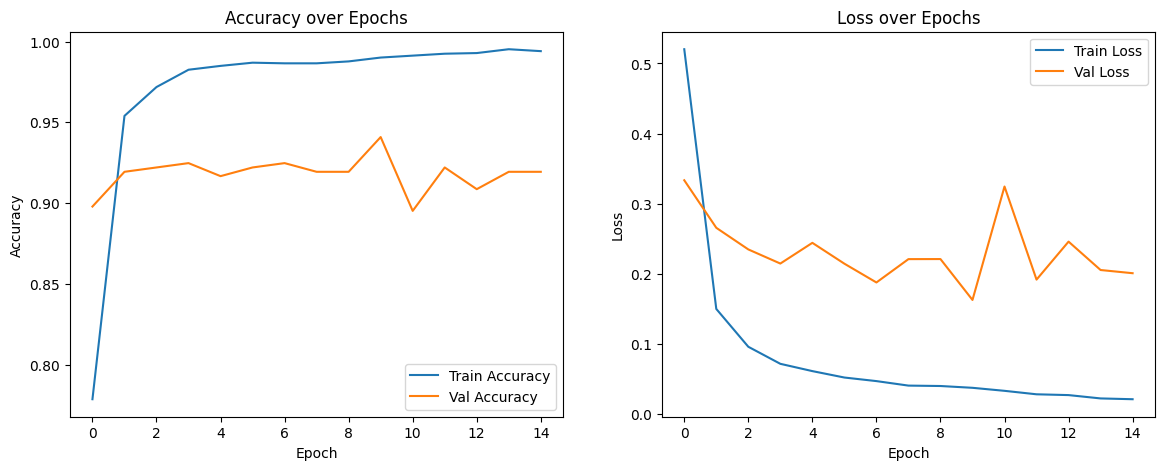

In [8]:
def plot_history(hist):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)


### Model Evaluation on Test Set and Prediction

In [11]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Re-load best model if needed
from tensorflow.keras.models import load_model
model = load_model('models/best_model.h5')


test_gen.reset()  
Y_pred = model.predict(test_gen, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = test_gen.classes

# Class names
class_names = list(test_gen.class_indices.keys())


12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step


#### Confusion Matrix and Classification report

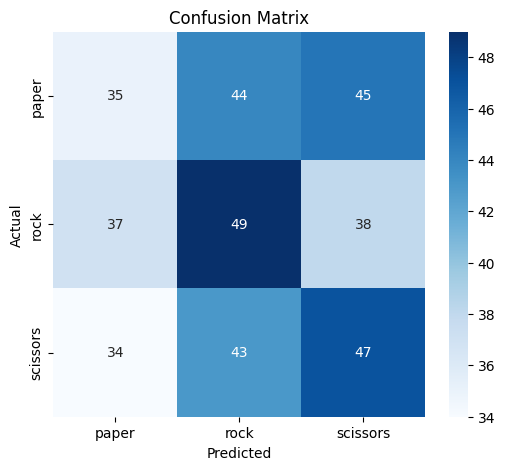

In [13]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [15]:
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n")
print(report)

with open("classification_report.txt", "w") as f:
    f.write(report)

Classification Report:

              precision    recall  f1-score   support

       paper       0.33      0.28      0.30       124
        rock       0.36      0.40      0.38       124
    scissors       0.36      0.38      0.37       124

    accuracy                           0.35       372
   macro avg       0.35      0.35      0.35       372
weighted avg       0.35      0.35      0.35       372

